# About this notebook

This notebook serves to test out pre-trained yolov8 detection/segementation function on land transport data sets. 

## References
1. https://medium.com/@KaziMushfiq1234/perform-prediction-on-images-using-trained-yolov8-with-python-c1b408f61d94
2. https://github.com/ultralytics/ultralytics

In [ ]:
## Installation
#!pip install ultralytics

## Download model weights from provided links
- [YOLOv8n](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt)
- [YOLOv8s](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt)
- [YOLOv8m](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8m.pt)
- [YOLOv8l](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8l.pt)
- [YOLOv8x](https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt)

For simplicity, use the nano version of the model 'YOLOv8n'.

In [13]:
import urllib.request
import os
model_weight = "yolov8n.pt"
url=f"https://github.com/ultralytics/assets/releases/download/v0.0.0/{model_weight}"
filename=os.path.join("..","model_weights",model_weight)
urllib.request.urlretrieve(url, filename)

('..\\model_weights\\yolov8n.pt', <http.client.HTTPMessage at 0x251adbd2c70>)

## Raw Image prediction using pre-trained model

- Yolov8_8n model

In [14]:
from ultralytics import YOLO
import os
# Define model and sample imag path
model_filename = os.path.join("..","model_weights",model_weight)
sample_image = os.path.join("..", "data", "images", "sample", "sample_image.jpg")


In [15]:
model = YOLO(model_filename)

# DO inference. Save results and images with results overlaid
results = model.predict(source=sample_image,
                        iou =0.7,
                        device="cpu",
                        boxes=True,
                        save=True,
                        save_txt=True,
                        hide_labels=False)



image 1/1 c:\Users\quekz\OneDrive\Desktop\Yolov8-for-Object-Detection-on-LTA-Traffic-Camera-feeds\notebooks\..\data\images\sample\sample_image.jpg: 384x640 4 cars, 2 trucks, 58.0ms
Speed: 1.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels


Another example with largest model: yolov8x

In [16]:
model_weight = "yolov8x.pt"
url=f"https://github.com/ultralytics/assets/releases/download/v0.0.0/{model_weight}"
filename=os.path.join("..","model_weights",model_weight)
urllib.request.urlretrieve(url, filename)
model_filename = os.path.join("..","model_weights",model_weight)
model = YOLO(model_filename)

# DO inference. Save results and images with results overlaid
results = model.predict(source=sample_image,
                        iou=0.7,
                        device="cpu",
                        boxes=True,
                        save=True,
                        save_txt=True,
                        hide_labels=False)


image 1/1 c:\Users\quekz\OneDrive\Desktop\Yolov8-for-Object-Detection-on-LTA-Traffic-Camera-feeds\notebooks\..\data\images\sample\sample_image.jpg: 384x640 9 cars, 1 bus, 1 truck, 350.1ms
Speed: 1.0ms preprocess, 350.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels


## Show sample prediction on sample image dataset

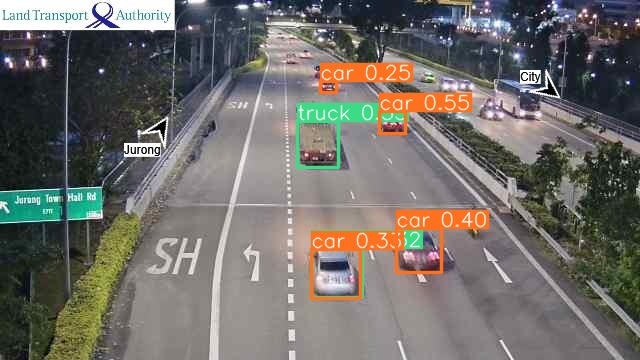

In [19]:
from IPython.display import Image 
# from PIL
generated_image = os.path.join("runs","detect","predict_8n", "sample_image.jpg")
generated_prediction_img = Image(generated_image)
display(generated_prediction_img)

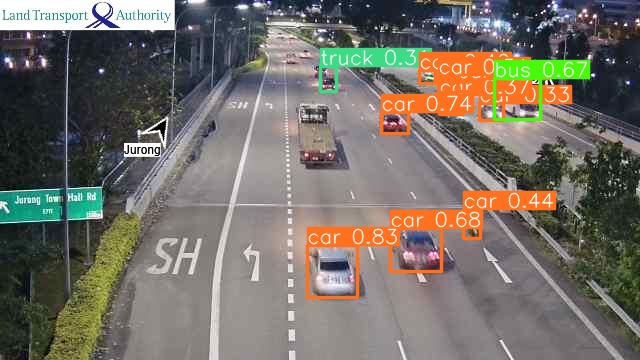

In [20]:
from IPython.display import Image 
# from PIL
generated_image = os.path.join("runs","detect","predict_8x", "sample_image.jpg")
generated_prediction_img = Image(generated_image)
display(generated_prediction_img)

## Raw Image segementation

In [ ]:
url="https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt"
model_weight = "yolov8x.pt"
filename=os.path.join("..","model_weights",model_weight)
urllib.request.urlretrieve(url, filename)

In [ ]:
model = YOLO(model_filename)

# DO inference. Save results and images with results overlaid
results = model.predict(source=sample_image,
                        iou = 0.7,
                        device="cpu",
                        boxes=True,
                        save=True,
                        save_txt=True)